In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)

## Praktikum

### a) Fungsi *Training* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def lvq_fit(train, target, lrate, b, max_epoch):
  label, train_idx = np.unique(target, return_index=True)
  weight = train[train_idx].astype(np.float64)
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])
  train, target = train[:, 0], train[:, 1]
  epoch = 0

  while epoch < max_epoch:
    for i, x in enumerate(train):
      distance = [sum((w - x) ** 2) for w in weight]
      min = np.argmin(distance)
      sign = 1 if target[i] == label[min] else -1
      weight[min] += sign * lrate * (x - weight[min])
    lrate *= b
    epoch += 1

  return weight, label

### b) Fungsi *Testing* LVQ

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def lvq_predict(X, model):
  center, label = model
  Y = []
  for x in X:
    d = [sum((c - x) ** 2) for c in center]
    Y.append(label[np.argmin(d)])
  return Y

### c) Fungsi Hitung Akurasi

In [4]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
  return sum(s) / len(a)

### d) Percobaan LVQ

Tulis kode ke dalam *cell* di bawah ini:

Accuracy: 0.5714285714285714


<ipython-input-2-972d1dfa3958>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train = np.array([e for i, e in enumerate(zip(train, target)) if i not in train_idx])


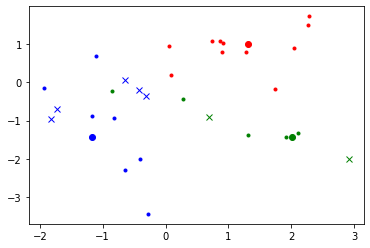

In [5]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification

X, y = make_classification(n_samples=31, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = lvq_fit(X_train, y_train, lrate=.5, b=.8, max_epoch=50)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)
colors = 'rgbcmyk'

print('Accuracy:', accuracy)
for x, label in zip(X_train, y_train):
  plt.plot(x[0], x[1], colors[label] + '.')
for center, label in zip(model[0], model[1]):
  plt.plot(center[0], center[1], colors[label] + 'o')
for x, label in zip(X_test, output):
  plt.plot(x[0], x[1], colors[label] + 'x')

## Post-test

Pada post-test kali ini, teman-teman akan menggunakan Hand-written MNIST. Teman-teman harus bisa membangun model LVQ yang mampu mengklasifikasikan citra tulisan tangan ke bentuk sebenarnya.

**Unduh dataset dari google drive**

**Representasi file csv ke citra asli**

In [6]:
data = pd.read_csv('data.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Teman-teman pada kali ini hanya diminta untuk melakukan klasifikasi 2 kelas. Hapus semua baris yang tidak berlabel x dan y!

In [7]:
# Hapus semua kelas, kecuali kelas x dan y, simpan ke variabel data_lite
data_lite = data[data['label'].isin([2,3])]
data_lite.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


IndexError: index 4 is out of bounds for axis 0 with size 3

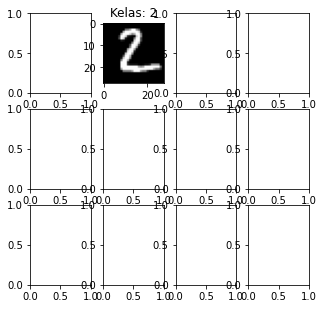

In [8]:
selected = data_lite.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [ ]:
target = data_lite.iloc[:, 0]  # Kolom pertama adalah kolom kelas/target
data = data_lite.iloc[:, 1:]   # Sisanya adalah data

# Konversi data dan target ke dalam array NumPy, simpan ke variabel X dan y
x = data.to_numpy()
y = target.to_numpy()

Lakukan pelatihan menggunakan X_train dan uji dengan X_test. Set parameter lainnya agar teman-teman mendapatkan akurasi > 0,9.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #jangan ubah baris ini

model = lvq_fit(X_train, y_train, lrate=.5 , b=.8 , max_epoch=100)
output = lvq_predict(X_test, model)
accuracy = calc_accuracy(output, y_test)

print('Accuracy:', accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [31, 2042]

### Pertanyaan

1.  Bagaimana arsitektur LVQ yang dibangun? Jelaskan jumlah input neuron dan output neuronnya!
2.  Bagaimana proses pelatihan LVQ agar bisa mencapai akurasi > 0,9? Jelaskan hasil tuning hyperparameternya!

Jawaban

1.  arsitektur dari algoritma LVQ sendiri merupakan sebuah neural network yang tidak memiliki hidden layer yang mana algoritma ini sendiri tergolong dari algoritma klasifikasi (ada label). dimana lapisannya sendiri hanya terdiri dari lapisan input dan output saja. dalam kasus ini untuk inputnya sendiri terdiri dari 28x28 pixel yaitu 784 pixel. dan untuk outputnya sendiri hanya terdiri dari 2 jenis yaitu label "2" atau label "3"
2.  untuk beberapa percobaan saat menggunakan beta = 0,5 hasil akurasinya adalah 0,6. sedangkan saat aku mengganti beta menjadi 0,8. hasilnya pun menjadi lebih baik dengan akurasi diatas sebelumnya yaitu 0,946. hal ini menunjukkan bahwa semakin besar beta maka akan semakin baik akurasinya.